In [9]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the size of the plots we will create

# Read in the data

df = pd.read_csv(r'C:\Users\Renzo\Startup\Project Movie\movies.csv')

In [10]:
# Looking at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [11]:
# Check if there is any missing data

for col in df.columns:
    print(df[col].isnull().value_counts(), "\n")


name
False    7668
Name: count, dtype: int64 

rating
False    7591
True       77
Name: count, dtype: int64 

genre
False    7668
Name: count, dtype: int64 

year
False    7668
Name: count, dtype: int64 

released
False    7666
True        2
Name: count, dtype: int64 

score
False    7665
True        3
Name: count, dtype: int64 

votes
False    7665
True        3
Name: count, dtype: int64 

director
False    7668
Name: count, dtype: int64 

writer
False    7665
True        3
Name: count, dtype: int64 

star
False    7667
True        1
Name: count, dtype: int64 

country
False    7665
True        3
Name: count, dtype: int64 

budget
False    5497
True     2171
Name: count, dtype: int64 

gross
False    7479
True      189
Name: count, dtype: int64 

company
False    7651
True       17
Name: count, dtype: int64 

runtime
False    7664
True        4
Name: count, dtype: int64 



In [12]:
# I decided to drop the rows of any missing data

df = df.dropna()

# Check if there are still any missing data

for col in df.columns:
    print(df[col].isnull().value_counts(), "\n")


name
False    5421
Name: count, dtype: int64 

rating
False    5421
Name: count, dtype: int64 

genre
False    5421
Name: count, dtype: int64 

year
False    5421
Name: count, dtype: int64 

released
False    5421
Name: count, dtype: int64 

score
False    5421
Name: count, dtype: int64 

votes
False    5421
Name: count, dtype: int64 

director
False    5421
Name: count, dtype: int64 

writer
False    5421
Name: count, dtype: int64 

star
False    5421
Name: count, dtype: int64 

country
False    5421
Name: count, dtype: int64 

budget
False    5421
Name: count, dtype: int64 

gross
False    5421
Name: count, dtype: int64 

company
False    5421
Name: count, dtype: int64 

runtime
False    5421
Name: count, dtype: int64 



In [13]:
# Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [14]:
# Convert columns into int64 to eliminate xx.0 to the data

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

df['votes'] = df['votes'].astype('int64')

df['score'] = df['score'].astype('int64')

In [15]:
# Create correct year column

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)


In [16]:
# Sorting gross revenue

df.sort_values(by=['gross'], inplace = False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


In [3]:
# Drop any duplicates (If you want)

# df['company'].sort_values(ascending=False)
# df.drop_duplicates() #Just uncomment this to drop the duplicates

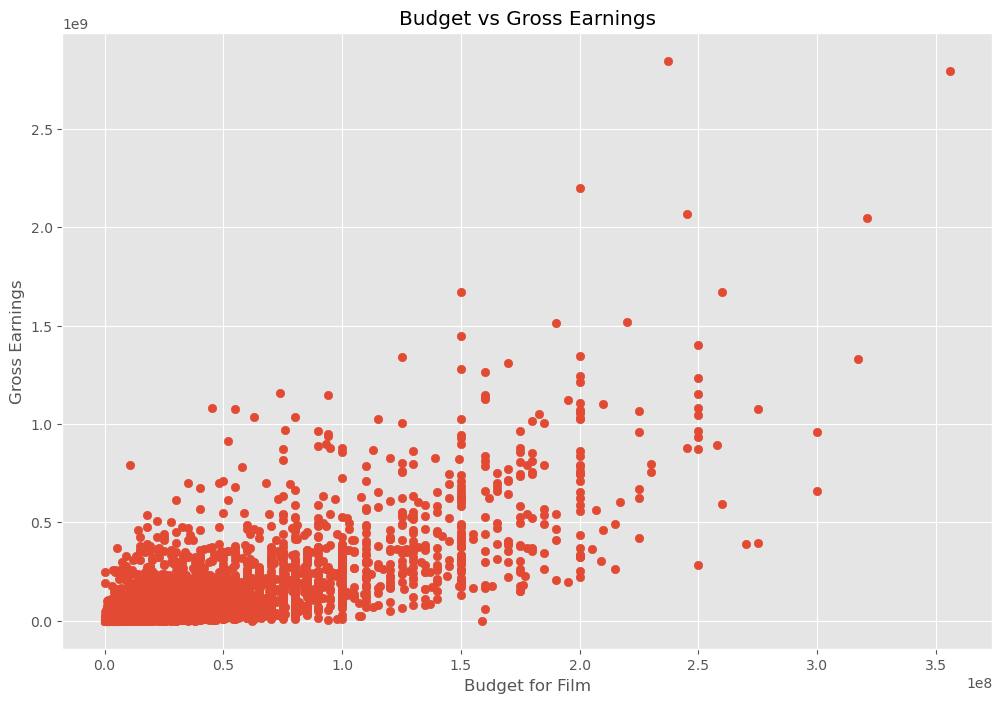

In [17]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

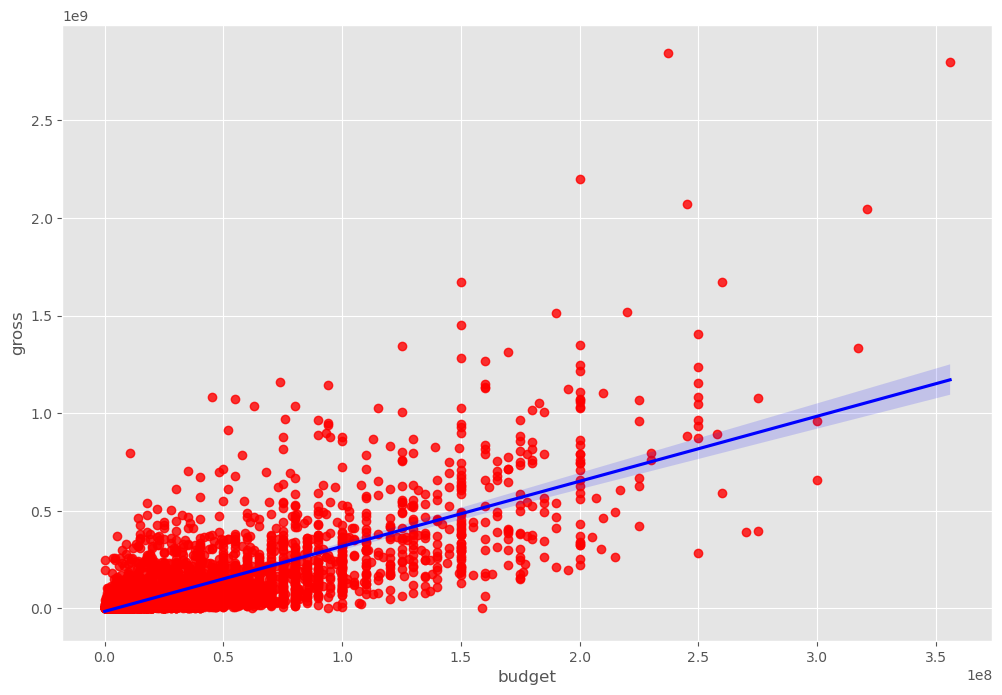

In [18]:
# Plot budget vs gross using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color" : "red"},
           line_kws = {"color" : "blue"})

In [19]:
# Let's start looking at correlation

df.corr(numeric_only = True)

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.057013,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.057013,1.000000,0.455808,0.066443,0.211973,0.394589,0.062234
votes,0.206021,0.455808,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.066443,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.211973,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.394589,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.998726,0.062234,0.203098,0.320312,0.268721,0.075294,1.000000


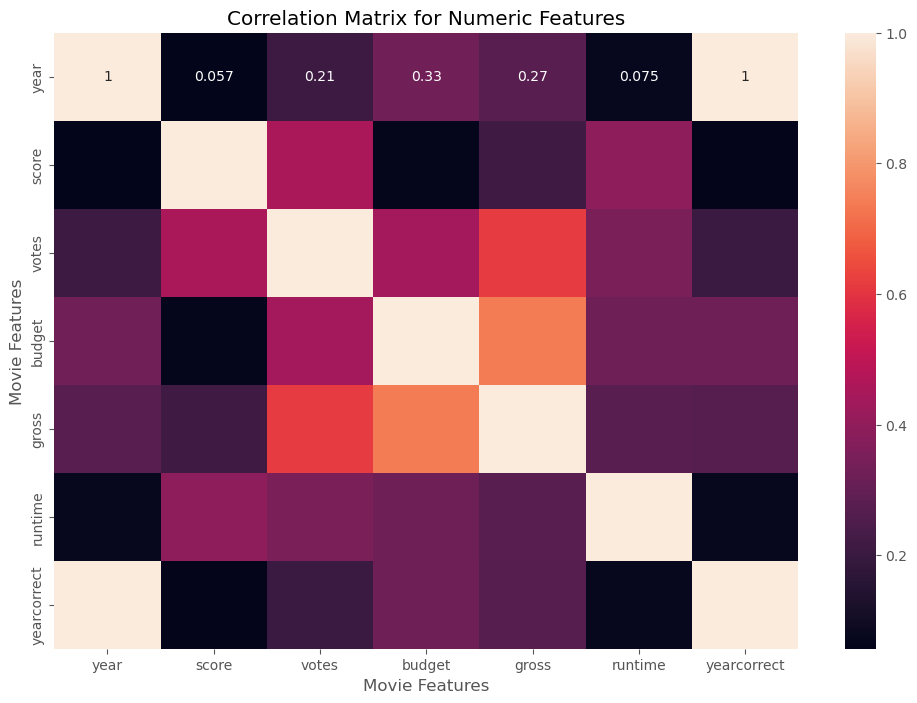

In [20]:
correlation_matrix = df.corr(numeric_only = True)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()